In [66]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib as mpl
import seaborn as sns

In [67]:
# load orders data set
orders = pd.read_csv("/Users/mymacpro/Documents/Machine Learning Lab/Lab1/data/Orders.csv")
orders.head()
#orders.shape

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Product.ID,Category,Sub.Category,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,TEC-PH-5816,Technology,Phones,Samsung Convoy 3,$221.98,2,0.0,$62.15,40.77,High
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,FUR-CH-5379,Furniture,Chairs,"Novimex Executive Leather Armchair, Black","$3,709.40",9,0.1,-$288.77,923.63,Critical
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,TEC-PH-5356,Technology,Phones,"Nokia Smart Phone, with Caller ID","$5,175.17",9,0.1,$919.97,915.49,Medium
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,TEC-PH-5267,Technology,Phones,"Motorola Smart Phone, Cordless","$2,892.51",5,0.1,-$96.54,910.16,Medium
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,TEC-CO-6011,Technology,Copiers,"Sharp Wireless Fax, High-Speed","$2,832.96",8,0.0,$311.52,903.04,Critical


In [68]:
# load return dataset
returns = pd.read_csv("/Users/mymacpro/Documents/Machine Learning Lab/Lab1/data/Returns.csv")
returns.rename(columns={'Order ID':'Order.ID'}, inplace=True)
returns.head()
#returns.shape

,Returned,Order.ID,Region
0,Yes,CA-2012-SA20830140-41210,Central US
1,Yes,IN-2012-PB19210127-41259,Eastern Asia
2,Yes,CA-2012-SC20095140-41174,Central US
3,Yes,IN-2015-JH158207-42140,Oceania
4,Yes,IN-2014-LC168857-41747,Oceania


### Problem 1: Dataset Import & Cleaning
Check **"Profit"** and **"Sales"** in the dataset, convert these two columns to numeric type. 

In [69]:
orders.dtypes

Row.ID              int64
Order.ID           object
Order.Date         object
Ship.Date          object
Ship.Mode          object
Customer.ID        object
Customer.Name      object
Segment            object
Postal.Code       float64
City               object
State              object
Country            object
Region             object
Market             object
Product.ID         object
Category           object
Sub.Category       object
Product.Name       object
Sales              object
Quantity            int64
Discount          float64
Profit             object
Shipping.Cost     float64
Order.Priority     object
dtype: object

In [70]:
orders['Profit'] = orders['Profit'].replace( '[$,]','', regex=True ).astype(float)
orders['Sales'] = orders['Sales'].replace( '[$,]','', regex=True ).astype(float)

### Problem 2: Inventory Management
- Retailers that depend on seasonal shoppers have a particularly challenging job when it comes to inventory management. Your manager is making plans for next year's inventory.
- He wants you to answer the following questions:
    1. Is there any seasonal trend of inventory in the company?
    2. Is the seasonal trend the same for different categories?

- ***Hint:*** For each order, it has an attribute called `Quantity` that indicates the number of product in the order. If an order contains more than one product, there will be multiple observations of the same order.

In [71]:
# convert order date to date time
orders['OrderDate'] = pd.to_datetime(orders['Order.Date'], format='%m/%d/%y')
# create column for year/month
orders['Year']=orders['OrderDate'].dt.year
orders['Month']=orders["OrderDate"].dt.month
orders['Quarter'] = orders["OrderDate"].dt.quarter

In [72]:
orders.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,OrderDate,Year,Month,Quarter
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.0,62.15,40.77,High,2014-11-11,2014,11,4
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.1,-288.77,923.63,Critical,2014-02-05,2014,2,1
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.1,919.97,915.49,Medium,2014-10-17,2014,10,4
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.1,-96.54,910.16,Medium,2014-01-28,2014,1,1
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.0,311.52,903.04,Critical,2014-11-05,2014,11,4


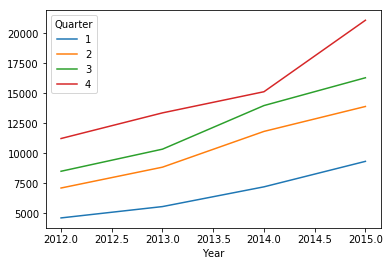

In [73]:
orders.groupby(['Year','Quarter'])['Quantity'].agg(np.sum).unstack().plot()

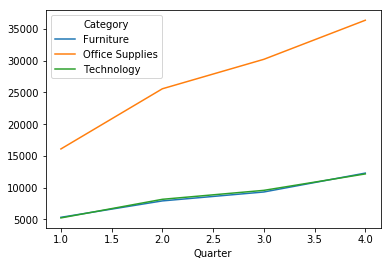

In [74]:
orders.groupby(['Quarter','Category'])['Quantity'].agg(np.sum).unstack().plot()

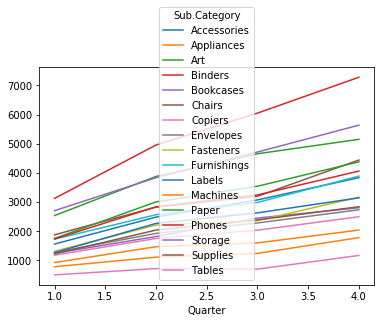

In [75]:
orders.groupby(['Quarter','Sub.Category'])['Quantity'].agg(np.sum).unstack().plot()

In [76]:
orders

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,OrderDate,Year,Month,Quarter
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,221.98,2,0.00,62.15,40.770,High,2014-11-11,2014,11,4
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,3709.40,9,0.10,-288.77,923.630,Critical,2014-02-05,2014,2,1
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,5175.17,9,0.10,919.97,915.490,Medium,2014-10-17,2014,10,4
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2892.51,5,0.10,-96.54,910.160,Medium,2014-01-28,2014,1,1
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2832.96,8,0.00,311.52,903.040,Critical,2014-11-05,2014,11,4
5,22732,IN-2014-JM156557-41818,6/28/14,7/1/14,Second Class,JM-156557,Jim Mitchum,Corporate,NaN,Sydney,...,2862.68,5,0.10,763.28,897.350,Critical,2014-06-28,2014,6,2
6,30570,IN-2012-TS2134092-41219,11/6/12,11/8/12,First Class,TS-2134092,Toby Swindell,Consumer,NaN,Porirua,...,1822.08,4,0.00,564.84,894.770,Critical,2012-11-06,2012,11,4
7,31192,IN-2013-MB1808592-41378,4/14/13,4/18/13,Standard Class,MB-1808592,Mick Brown,Consumer,NaN,Hamilton,...,5244.84,6,0.00,996.48,878.380,High,2013-04-14,2013,4,2
8,40099,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,341.96,2,0.00,54.71,25.270,High,2014-11-11,2014,11,4
9,36258,CA-2012-AB10015140-40974,3/6/12,3/7/12,First Class,AB-100151404,Aaron Bergman,Consumer,98103.0,Seattle,...,48.71,1,0.20,5.48,11.130,High,2012-03-06,2012,3,1


### Problem 3: Why did customers make returns?
- Your manager required you to give a brief report (**Plots + Interpretations**) on returned orders.

	1. How much profit did we lose due to returns each year?


	2. How many customer returned more than once? more than 5 times?


	3. Which regions are more likely to return orders?


	4. Which categories (sub-categories) of products are more likely to be returned?

- ***Hint:*** Merge the **Returns** dataframe with the **Orders** dataframe using `Order.ID`.

In [77]:
merged = pd.merge(orders, returns, how = "left", on="Order.ID")
merged.Returned.fillna("No",inplace=True)

In [78]:
merged.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Discount,Profit,Shipping.Cost,Order.Priority,OrderDate,Year,Month,Quarter,Returned,Region_y
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,0.0,62.15,40.77,High,2014-11-11,2014,11,4,No,NaN
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,0.1,-288.77,923.63,Critical,2014-02-05,2014,2,1,No,NaN
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,0.1,919.97,915.49,Medium,2014-10-17,2014,10,4,No,NaN
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,0.1,-96.54,910.16,Medium,2014-01-28,2014,1,1,No,NaN
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,0.0,311.52,903.04,Critical,2014-11-05,2014,11,4,No,NaN


In [79]:
merged['boolean'] = merged.Returned.replace(('Yes','No'),(1,0))
merged.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,Profit,Shipping.Cost,Order.Priority,OrderDate,Year,Month,Quarter,Returned,Region_y,boolean
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,62.15,40.77,High,2014-11-11,2014,11,4,No,NaN,0
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,-288.77,923.63,Critical,2014-02-05,2014,2,1,No,NaN,0
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,919.97,915.49,Medium,2014-10-17,2014,10,4,No,NaN,0
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,-96.54,910.16,Medium,2014-01-28,2014,1,1,No,NaN,0
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,311.52,903.04,Critical,2014-11-05,2014,11,4,No,NaN,0


In [80]:
merged.Returned.value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

In [81]:
#merged[merged['Returned']=="Yes"]
merged.groupby('Returned')['Profit'].agg(np.sum)

Returned
No     1406085.92
Yes      61370.75
Name: Profit, dtype: float64

In [82]:
# 547 customers returned more than once
a = merged[merged['Returned']=="Yes"]
b = a['Customer.ID'].value_counts()
len(b[b>1])

547

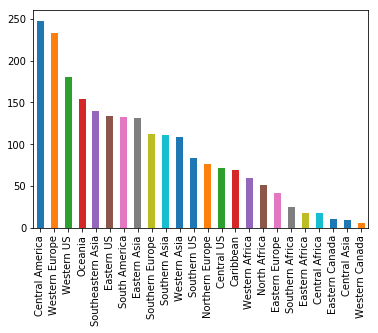

In [83]:
# Central America more likely to return orders
a.Region_y.value_counts().plot.bar()

In [84]:
a.groupby(['Category','Sub.Category'])[['boolean']].agg(np.sum)

boolean
Category        Sub.Category         
Furniture       Bookcases         104
                Chairs            147
                Furnishings       135
                Tables             41
Office Supplies Appliances         59
                Art               217
                Binders           269
                Envelopes          99
                Fasteners         102
                Labels            137
                Paper             150
                Storage           212
                Supplies          103
Technology      Accessories       138
                Copiers            99
                Machines           63
                Phones            145

## Part II: Machine Learning and Business Use Case

### Problem 4: Feature Engineering
#### Step 1: Create the dependent variable
- First of all, we need to generate a categorical variable which indicates whether an order has been returned or not.
- ***Hint:*** the returned orders’ IDs are contained in the dataset “returns”

In [85]:
merged.Returned.value_counts()

No     49070
Yes     2220
Name: Returned, dtype: int64

#### Step 2:
- Your manager believes that **how long it took the order to ship** would affect whether the customer would return it or not. 
- He wants you to generate a feature which can measure how long it takes the company to process each order.
- ***Hint:*** Process.Time = Ship.Date - Order.Date

In [86]:
merged['ShipDate'] = pd.to_datetime(orders['Ship.Date'], format='%m/%d/%y')
merged['ProcessTime'] = merged['ShipDate']-merged['OrderDate']
merged['ProcessTime'].head()

0   2 days
1   2 days
2   1 days
3   2 days
4   1 days
Name: ProcessTime, dtype: timedelta64[ns]

#### Step 3:

- If a product has been returned before, it may be returned again. 
- Let us generate a feature indictes how many times the product has been returned before.
- If it never got returned, we just impute using 0.
- ***Hint:*** Group by different Product.ID

In [87]:
returnCount = merged.groupby('Product.ID')['boolean'].agg(['sum']).reset_index()
merged = pd.merge(merged, returnCount, how='left',on = 'Product.ID')
merged.head()

,Row.ID,Order.ID,Order.Date,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,...,OrderDate,Year,Month,Quarter,Returned,Region_y,boolean,ShipDate,ProcessTime,sum
0,40098,CA-2014-AB10015140-41954,11/11/14,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,...,2014-11-11,2014,11,4,No,NaN,0,2014-11-13,2 days,0
1,26341,IN-2014-JR162107-41675,2/5/14,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,...,2014-02-05,2014,2,1,No,NaN,0,2014-02-07,2 days,2
2,25330,IN-2014-CR127307-41929,10/17/14,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,...,2014-10-17,2014,10,4,No,NaN,0,2014-10-18,1 days,2
3,13524,ES-2014-KM1637548-41667,1/28/14,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,...,2014-01-28,2014,1,1,No,NaN,0,2014-01-30,2 days,0
4,47221,SG-2014-RH9495111-41948,11/5/14,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,...,2014-11-05,2014,11,4,No,NaN,0,2014-11-06,1 days,0


### Problem 5: Fitting Models

- You can use any binary classification method you have learned so far.
- Use 80/20 training and test splits to build your model. 
- Double check the column types before you fit the model.
- Only include useful features. i.e all the `ID`s should be excluded from your training set.
- Not that there are only less than 5% of the orders have been returned, so you should consider using the `createDataPartition` function from `caret` package that does a **stratified** random split of the data.
- Do forget to `set.seed()` before the spilt to make your result reproducible.
- **Note:** We are not looking for the best tuned model in the lab so don't spend too much time on grid search. Focus on model evaluation and the business use case of each model.